# __Indian Air Quality (2015-2020)__

## __1. Introducción al Problema__

### __Resumen__

La calidad del aire es uno de los indicadores ambientales más críticos para la salud pública y el bienestar de una población. Este conjunto de datos proporciona mediciones horarias y diarias de contaminantes clave en varias ciudades de la India, junto con el Índice de Calidad del Aire (AQI), un valor calculado que resume el impacto total de estos contaminantes en la atmósfera. El monitoreo de la calidad del aire y su análisis son esenciales para identificar patrones, tendencias y fuentes de contaminación que afecten a las ciudades de manera diferencial.

### __Contexto Comercial__

La creciente industrialización y urbanización han generado preocupaciones respecto a la calidad del aire, especialmente en economías emergentes como India, donde ciudades densamente pobladas enfrentan altos niveles de contaminación. La información derivada de los análisis de la calidad del aire puede ser utilizada por agencias gubernamentales, organismos de salud pública y empresas privadas para tomar decisiones informadas sobre políticas de reducción de contaminantes, estrategias de mitigación y planificación urbana.

Empresas que se dedican a servicios medioambientales, manufactura y transporte pueden beneficiarse de este análisis, ya que permite detectar fuentes de contaminación, optimizar sus operaciones para reducir su huella de carbono, y responder adecuadamente a las regulaciones ambientales.

### __Preguntas de Hipótesis__

A través de un análisis exploratorio de los datos, buscaremos responder a las siguientes preguntas clave:

1. **¿Qué ciudades muestran los niveles más altos de contaminación?**
   - ¿Cómo se comportan los niveles de contaminantes como PM2.5, PM10 y NO2 en diferentes ciudades a lo largo del tiempo?

2. **¿Existen patrones temporales que afecten los niveles de contaminación?**
   - ¿Se observan aumentos en los contaminantes durante ciertas estaciones del año o momentos del día?

3. **¿Qué contaminantes contribuyen más al aumento del AQI?**
   - ¿Cómo se correlacionan las concentraciones de diferentes contaminantes con el AQI y qué variables parecen tener mayor impacto en los niveles de calidad del aire?

4. **¿Cómo varía la calidad del aire entre zonas industriales y residenciales?**
   - ¿Qué diferencia existe en los niveles de contaminación en ciudades con mayor actividad industrial en comparación con zonas más residenciales o turísticas?

5. **¿Qué ciudades necesitan intervenciones más urgentes para mejorar su calidad del aire?**
   - ¿Podemos identificar áreas críticas donde los niveles de contaminación han superado los umbrales seguros y requieren medidas inmediatas?

Este análisis nos permitirá comprender los patrones subyacentes a los niveles de contaminación en India y proporcionará una base para recomendar estrategias de intervención para mejorar la calidad del aire. Los resultados también ofrecerán una perspectiva detallada que ayudará a las partes interesadas a tomar decisiones mejor informadas sobre la gestión ambiental y la salud pública.

## __2. Extracción de datos desde la API__

In [1]:
# Instalar kaggle
!pip install kaggle

In [2]:
# Cargar credenciales de kaggle
!kaggle datasets download -d rohanrao/air-quality-data-in-india

Dataset URL: https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india
License(s): CC0-1.0
air-quality-data-in-india.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile

# Reemplaza 'archivo.zip' con el nombre de tu archivo
with zipfile.ZipFile('air-quality-data-in-india.zip', 'r') as zip_ref:
    zip_ref.extractall()

## __3. Cargar la base de datos__

### Descripción de los Datos

El conjunto de datos contiene información sobre la calidad del aire en varias ciudades de India, con medidas de varios contaminantes y su impacto en el Índice de Calidad del Aire (AQI). Los datos están organizados en las siguientes características:

#### Características:

- **`City`**: La ciudad donde se tomaron las mediciones de calidad del aire.

- **`Date`**: La fecha de la medición de la calidad del aire.

- **`PM2.5`**: Concentración de material particulado con un diámetro menor de 2.5 micrómetros (μg/m³).

- **`PM10`**: Concentración de material particulado con un diámetro menor de 10 micrómetros (μg/m³).

- **`NO`**: Concentración de óxido nítrico (NO) en el aire (μg/m³).

- **`NO2`**: Concentración de dióxido de nitrógeno (NO₂) en el aire (μg/m³).

- **`NOx`**: Concentración de óxidos de nitrógeno totales (NOx) en el aire (μg/m³).

- **`NH3`**: Concentración de amoníaco (NH₃) en el aire (μg/m³).

- **`CO`**: Concentración de monóxido de carbono (CO) en el aire (mg/m³).

- **`SO2`**: Concentración de dióxido de azufre (SO₂) en el aire (μg/m³).

- **`O3`**: Concentración de ozono (O₃) en el aire (μg/m³).

- **`Benzene`**: Concentración de benceno (C₆H₆) en el aire (μg/m³).

- **`Toluene`**: Concentración de tolueno (C₇H₈) en el aire (μg/m³).

- **`Xylene`**: Concentración de xileno (C₈H₁₀) en el aire (μg/m³).

#### Variable Objetivo:

- **`AQI`**: Índice de Calidad del Aire, que es un valor numérico calculado a partir de las concentraciones de contaminantes clave, utilizado para evaluar la calidad del aire en una ubicación particular.

- **`AQI_Bucket`**: Categoría asociada con el AQI que indica la calidad del aire, como "Good", "Satisfactory", etc.

#### Objetivo:

El objetivo principal es analizar la calidad del aire y predecir o categorizar el Índice de Calidad del Aire (AQI) en función de las concentraciones de varios contaminantes presentes en las ciudades.

In [4]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [5]:
# Cargar la base de datos y convertir a DataFrame
df = pd.read_csv('city_day.csv')

df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
# Tamaño del DataFrame
df.shape

(29531, 16)

In [7]:
# Informacion del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [8]:
# Verificar valores nulos
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [9]:
# Porcentaje de valores nulos
df.isnull().sum() / df.shape[0] * 100

City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64

## __Data Wrangling__

#### __Valores Duplicados__

In [10]:
# Verificar si hay valores duplicados
df.duplicated().sum()

0

Observamos que nuestro DataFrame no contiene valores duplicados, es decir, cada registro es único.

Convertiremos la columna Date a tipo fecha para facilitar cualquier análisis de series temporales

#### __Tipos de Datos__

In [11]:
# Cambiamos la columna Date a tipo fecha
df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

#### __Valores Nulos__

En esta sección, vamos a aplicar varias técnicas para manejar los valores nulos en el conjunto de datos, de acuerdo con las características específicas de cada columna:

1. **Imputación por Mediana (CO)**:

   - La columna `CO` tiene un porcentaje bajo de valores nulos (6.97%), por lo que se utilizará la mediana para imputar estos valores faltantes. Esta técnica es adecuada cuando los valores siguen una distribución continua y la mediana es robusta frente a valores atípicos.

2. **Interpolación para Contaminantes Clave (PM2.5, NO, NO2, NOx, SO2, O3, Benzene)**:

   - Para las columnas de contaminantes clave, usaremos la **interpolación lineal**. Dado que estas columnas tienen una tendencia temporal, la interpolación puede proporcionar una estimación precisa de los valores faltantes basándose en los valores previos y futuros. Para los casos en los que la interpolación no sea posible (como en los extremos de los datos), se imputará con la mediana.

3. **Imputación por Mediana (PM10, NH3, Toluene)**:

   - Aunque estas columnas tienen una proporción mayor de datos faltantes (27% - 37%), imputar con la mediana sigue siendo razonable si se desea incluir estas variables en el análisis. Si más adelante se determina que no son necesarias, podrían eliminarse.

4. **Eliminación de la Columna Xylene**:

   - La columna `Xylene` tiene más del 60% de datos faltantes, lo que sugiere que la imputación podría generar demasiada incertidumbre. Por lo tanto, se eliminará esta columna para evitar afectar la calidad del análisis.

5. **Imputación del AQI y AQI_Bucket**:

   - Para las columnas `AQI` y `AQI_Bucket`, se intentará recalcular el AQI a partir de los datos de contaminantes si es posible. Si no se puede hacer este cálculo, se imputarán los valores faltantes usando la mediana para el AQI y la moda para `AQI_Bucket`, ambos agrupados por ciudad.

El objetivo de estas acciones es asegurar que el conjunto de datos esté limpio y listo para el análisis posterior, minimizando el impacto de los valores faltantes y evitando la introducción de sesgos.

In [12]:
# 1. Imputación con la mediana para CO
df['CO'].fillna(df['CO'].median(), inplace=True)

# 2. Interpolación o imputación para contaminantes clave

# Interpolación para PM2.5, NO, NO2, NOx, SO2, O3, Benzene
df['PM2.5'].interpolate(method='linear', limit_direction='forward', inplace=True)
df['NO'].interpolate(method='linear', limit_direction='forward', inplace=True)
df['NO2'].interpolate(method='linear', limit_direction='forward', inplace=True)
df['NOx'].interpolate(method='linear', limit_direction='forward', inplace=True)
df['SO2'].interpolate(method='linear', limit_direction='forward', inplace=True)
df['O3'].interpolate(method='linear', limit_direction='forward', inplace=True)
df['Benzene'].interpolate(method='linear', limit_direction='forward', inplace=True)

# Para valores nulos en los extremos donde la interpolación no funciona, podemos imputar con la mediana:
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)
df['NO'].fillna(df['NO'].median(), inplace=True)
df['NO2'].fillna(df['NO2'].median(), inplace=True)
df['NOx'].fillna(df['NOx'].median(), inplace=True)
df['SO2'].fillna(df['SO2'].median(), inplace=True)
df['O3'].fillna(df['O3'].median(), inplace=True)
df['Benzene'].fillna(df['Benzene'].median(), inplace=True)

# 3. Para PM10, NH3 y Toluene, imputar con la mediana, si se decide mantenerlas.
df['PM10'].fillna(df['PM10'].median(), inplace=True)
df['NH3'].fillna(df['NH3'].median(), inplace=True)
df['Toluene'].fillna(df['Toluene'].median(), inplace=True)

# 4. Eliminar la columna Xylene debido a su alto porcentaje de valores nulos.
df.drop(columns=['Xylene'], inplace=True)

# 5. Imputar el AQI con la mediana si no se puede recalcular
df['AQI'].fillna(df.groupby('City')['AQI'].transform('median'), inplace=True)
df['AQI_Bucket'].fillna(df.groupby('City')['AQI_Bucket'].transform(lambda x: x.mode()[0]), inplace=True)

# Verificar si quedan valores nulos
print(df.isnull().sum())

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64


In [13]:
# Resumen de la base de datos
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,29531,2018-05-14 05:40:15.807118080,2015-01-01 00:00:00,2017-04-16 00:00:00,2018-08-05 00:00:00,2019-09-03 00:00:00,2020-07-01 00:00:00,NaN
PM2.5,29531.0,68.006151,0.04,28.78559,47.74,82.785,949.99,66.17202
PM10,29531.0,109.659366,0.01,79.315,95.68,111.88,1000.0,72.32402
NO,29531.0,20.905869,0.02,5.94,10.39,22.85,390.68,29.030479
NO2,29531.0,27.14341,0.01,11.29,20.275099,35.24,362.21,23.784354
NOx,29531.0,33.9172,0.0,13.89,24.48,42.38,467.63,32.158578
NH3,29531.0,20.813789,0.01,12.04,15.85,21.755,352.89,21.028862
CO,29531.0,2.153872,0.0,0.54,0.89,1.38,175.81,6.72466
SO2,29531.0,18.966607,0.01,5.87,9.68,17.66,193.86,27.3765
O3,29531.0,33.576828,0.01,18.71,29.76,43.828103,257.73,21.182258


#### Valores Atípicos

Observaremos la distribucion de los datos para verificar la existencia de outliers.

c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


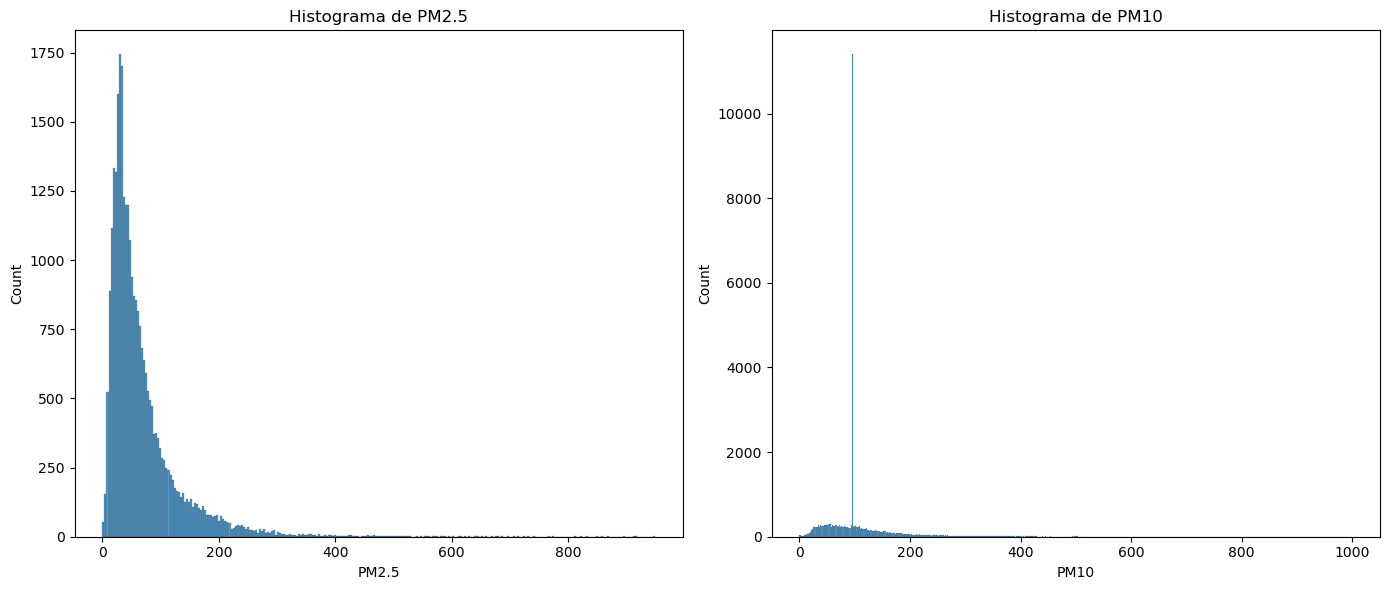

In [14]:
# Mostrar distribuciones para PM2.5 y PM10

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # figsize ajustado para dar espacio a ambas gráficas

# Histograma para PM2.5 en el primer gráfico (primer subplot)
sns.histplot(data=df['PM2.5'], ax=axes[0])
axes[0].set_title('Histograma de PM2.5')

# Histograma para PM10 en el segundo gráfico (segundo subplot)
sns.histplot(data=df['PM10'], ax=axes[1])
axes[1].set_title('Histograma de PM10')

# Ajustar el espaciado para que las gráficas no se superpongan
plt.tight_layout()
plt.show()

c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

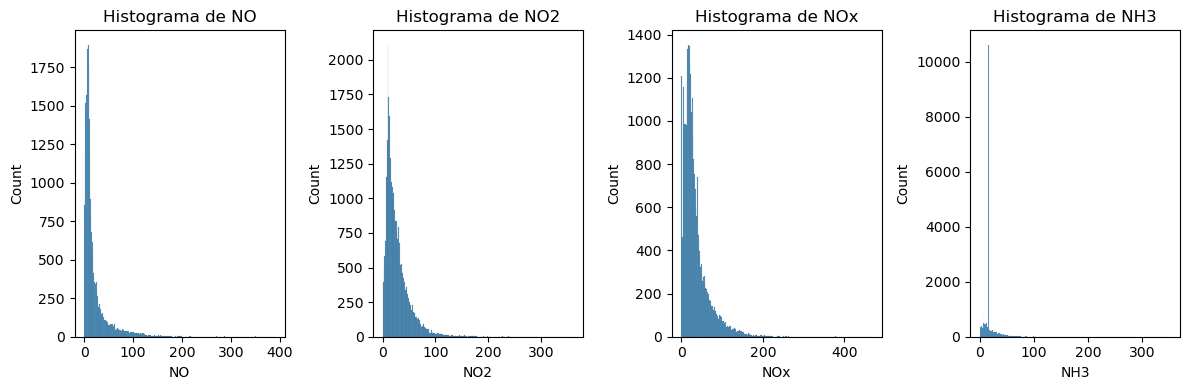

In [15]:
# Mostrar distribucion para NO, NO2, NOx, NH3

fig, axes = plt.subplots(1, 4, figsize=(12, 4))  # figsize ajustado para dar espacio a las graficas

# Histograma para NO
sns.histplot(data=df['NO'], ax=axes[0])
axes[0].set_title('Histograma de NO')

# Histograma para NO2
sns.histplot(data=df['NO2'], ax=axes[1])
axes[1].set_title('Histograma de NO2')

# Histograma para NOx
sns.histplot(data=df['NOx'], ax=axes[2])
axes[2].set_title('Histograma de NOx')

# Histograma para NH3
sns.histplot(data=df['NH3'], ax=axes[3])
axes[3].set_title('Histograma de NH3')

# Ajustar el espaciado para que las gráficas no se superpongan
plt.tight_layout()
plt.show()

c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


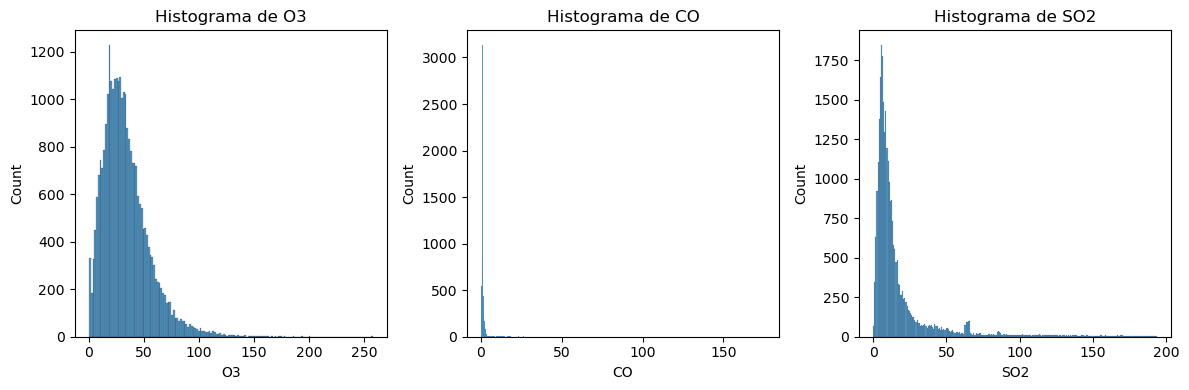

In [16]:
# Mostrar distribucion para O3, CO, SO2

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # figsize ajustado para dar espacio a las graficas

# Histograma para O3
sns.histplot(data=df['O3'], ax=axes[0])
axes[0].set_title('Histograma de O3')

# Histograma para CO
sns.histplot(data=df['CO'], ax=axes[1])
axes[1].set_title('Histograma de CO')

# Histograma para SO2
sns.histplot(data=df['SO2'], ax=axes[2])
axes[2].set_title('Histograma de SO2')

# Ajustar el espaciado para que las gráficas no se superpongan  
plt.tight_layout()
plt.show()

c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


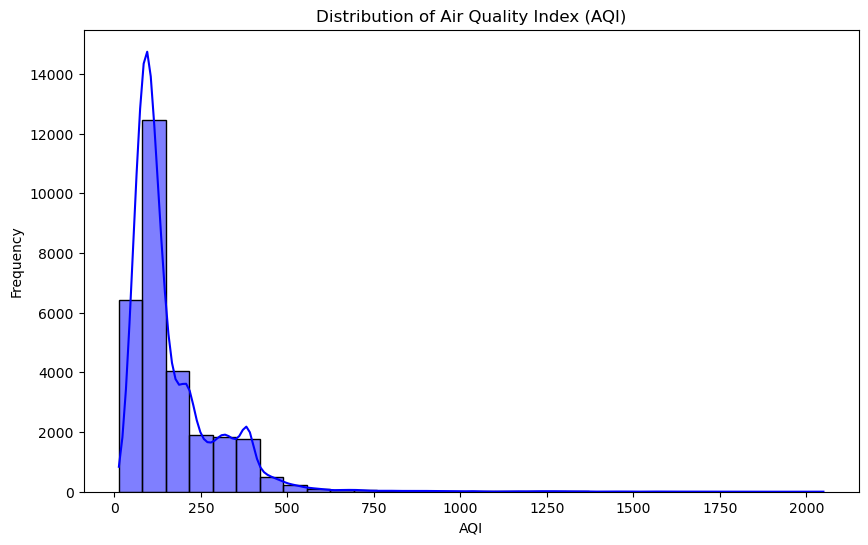

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI'], bins=30, kde=True, color='blue')
plt.title('Distribution of Air Quality Index (AQI)')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

Observamos que todas las columnas presentan una distribucion leptocurtica con asimetría hacia la derecha, por lo que consideraremos normalizar las variables continuas antes de construir un modelo de machine learning.

c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


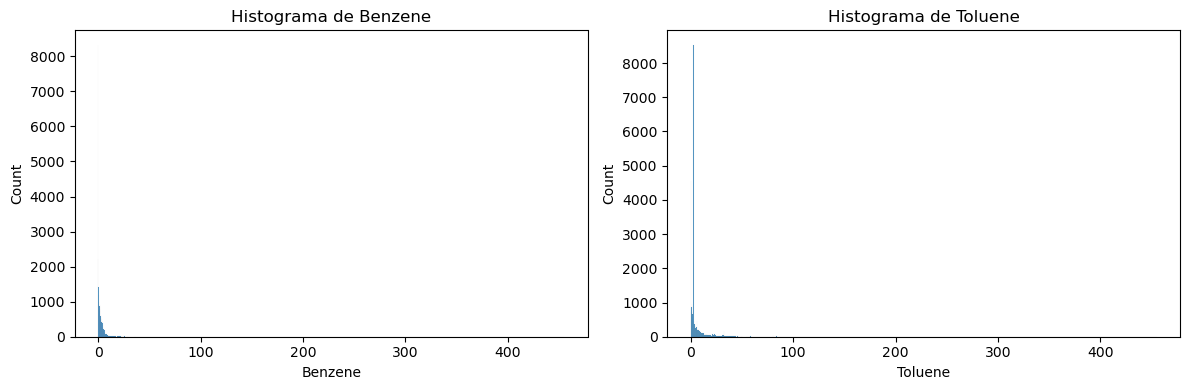

In [18]:
# Mostrar distribucion para Benzene, Toluene

fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # figsize ajustado para dar espacio a las graficas

# Histograma para Benzene
sns.histplot(data=df['Benzene'], ax=axes[0])
axes[0].set_title('Histograma de Benzene')

# Histograma para Toluene
sns.histplot(data=df['Toluene'], ax=axes[1])
axes[1].set_title('Histograma de Toluene')

# Ajustar el espaciado para que las gráficas no se superpongan
plt.tight_layout()
plt.show()

<Axes: >

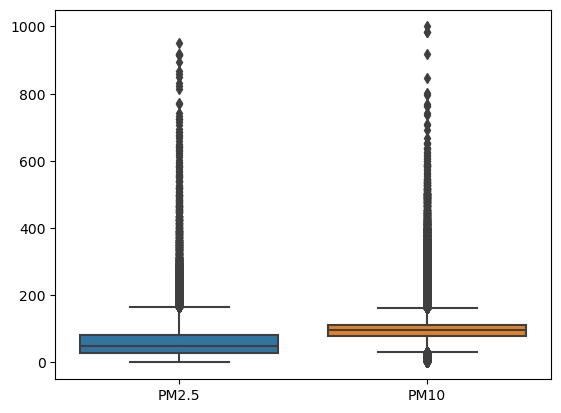

In [19]:
# Mostrar el diagrama de caja PM2.5 y PM10
sns.boxplot(data=df[[ 'PM2.5', 'PM10']])

<Axes: >

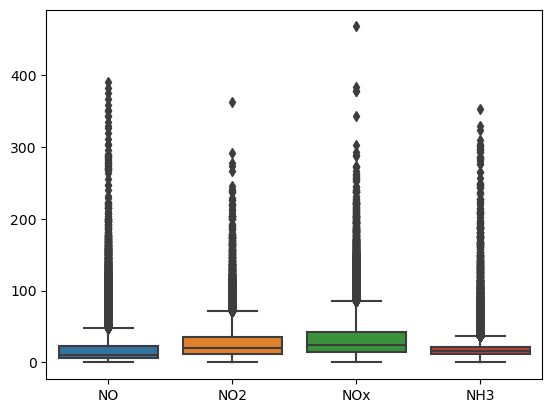

In [20]:
# Mostrar el diagrama de caja NO, NO2, NOx, NH3
sns.boxplot(data=df[[ 'NO', 'NO2', 'NOx','NH3']]) 

<Axes: >

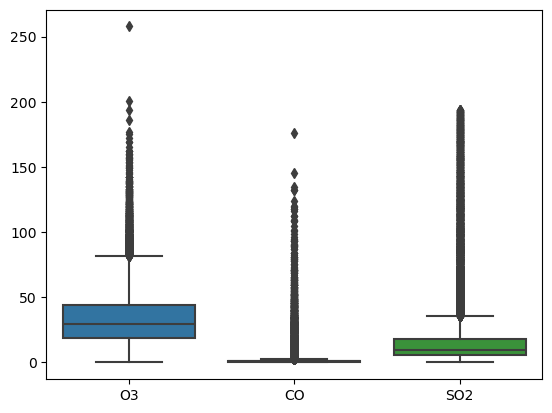

In [21]:
# Mostrar el diagrama de caja O3, CO, SO2
sns.boxplot(data=df[[ 'O3', 'CO', 'SO2']])

<Axes: >

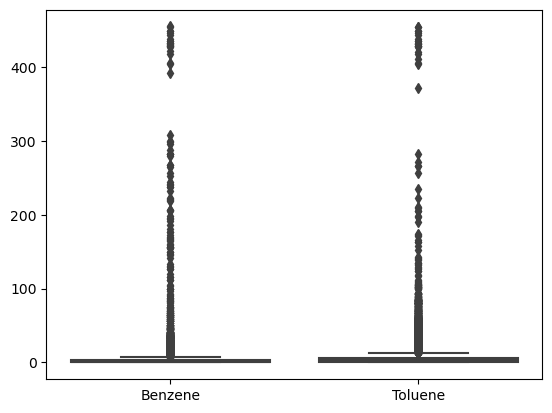

In [22]:
# Mostrar el diagrama de caja Toluene, Benzene
sns.boxplot(data=df[[ 'Benzene', 'Toluene']])

<Axes: >

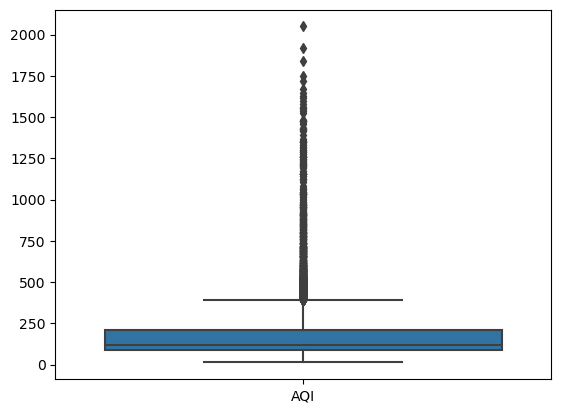

In [23]:
# Mostrar el diagrama de caja AQI
sns.boxplot(data=df[['AQI']])

Observamos que había demasiados valores atípicos en nuestras variables independientes. Pensamos que si filtramos los datos obtendremos resultados incorrectos que no reflejarían la realidad, así que no cambiaremos los valores atípicos.

## __Exploracion de Datos (EDA)__

1. **¿Qué ciudades muestran los niveles más altos de contaminación?**

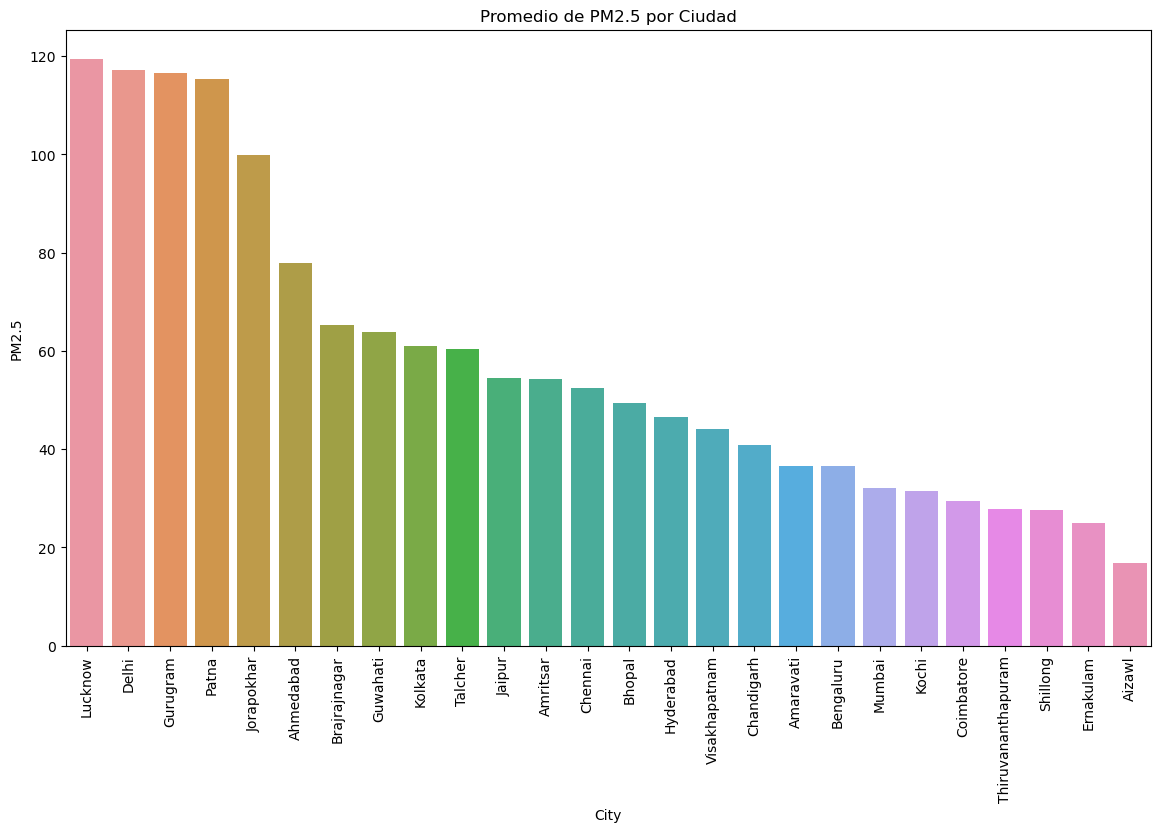

In [24]:
# Agrupar los datos por ciudad y calcular el promedio de contaminantes
city_pollution = df.groupby('City')[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','CO']].mean().reset_index().sort_values(by='PM2.5', ascending=False)

# Visualización de los contaminantes promedio por ciudad
plt.figure(figsize=(14, 8))
sns.barplot(x='City', y='PM2.5', data=city_pollution)
plt.xticks(rotation=90)
plt.title('Promedio de PM2.5 por Ciudad')
plt.show()


 Las ciudades con los niveles más altos de contaminación, medidos por la concentración de PM2.5, son Lucknow, Delhi, Gurugram, Patna, Jorapokhar y Ahmedabad. Estas ciudades presentan las mayores concentraciones de material particulado fino, lo que indica una alta contaminación del aire en comparación con otras ciudades.

2. **¿Existen patrones temporales que afecten los niveles de contaminación?**

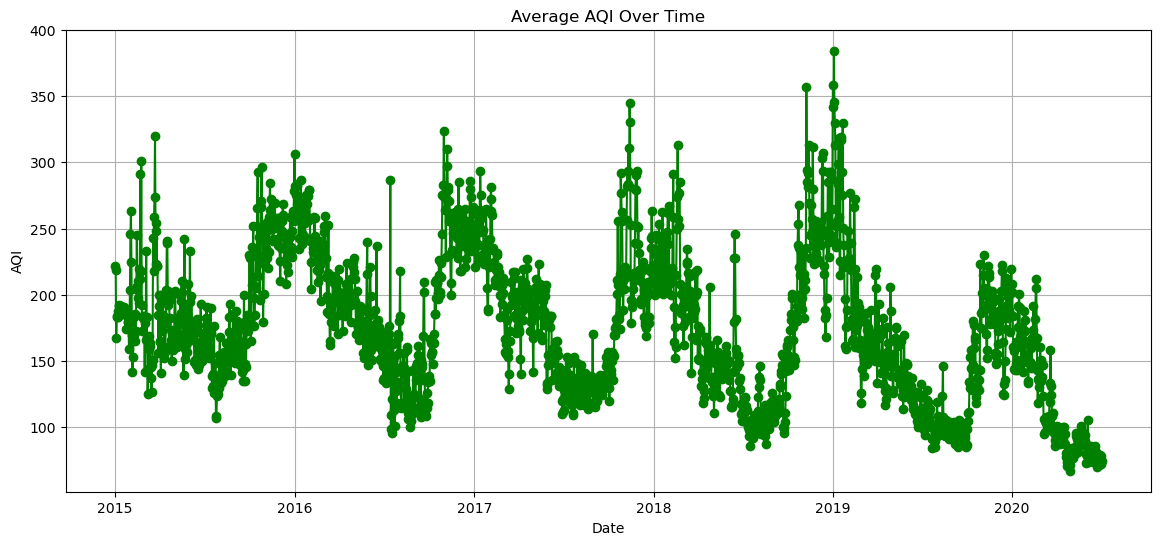

In [25]:
daily_aqi = df.groupby('Date')['AQI'].mean()

plt.figure(figsize=(14, 6))
plt.plot(daily_aqi.index, daily_aqi.values, marker='o', linestyle='-', color='green')
plt.title('Average AQI Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

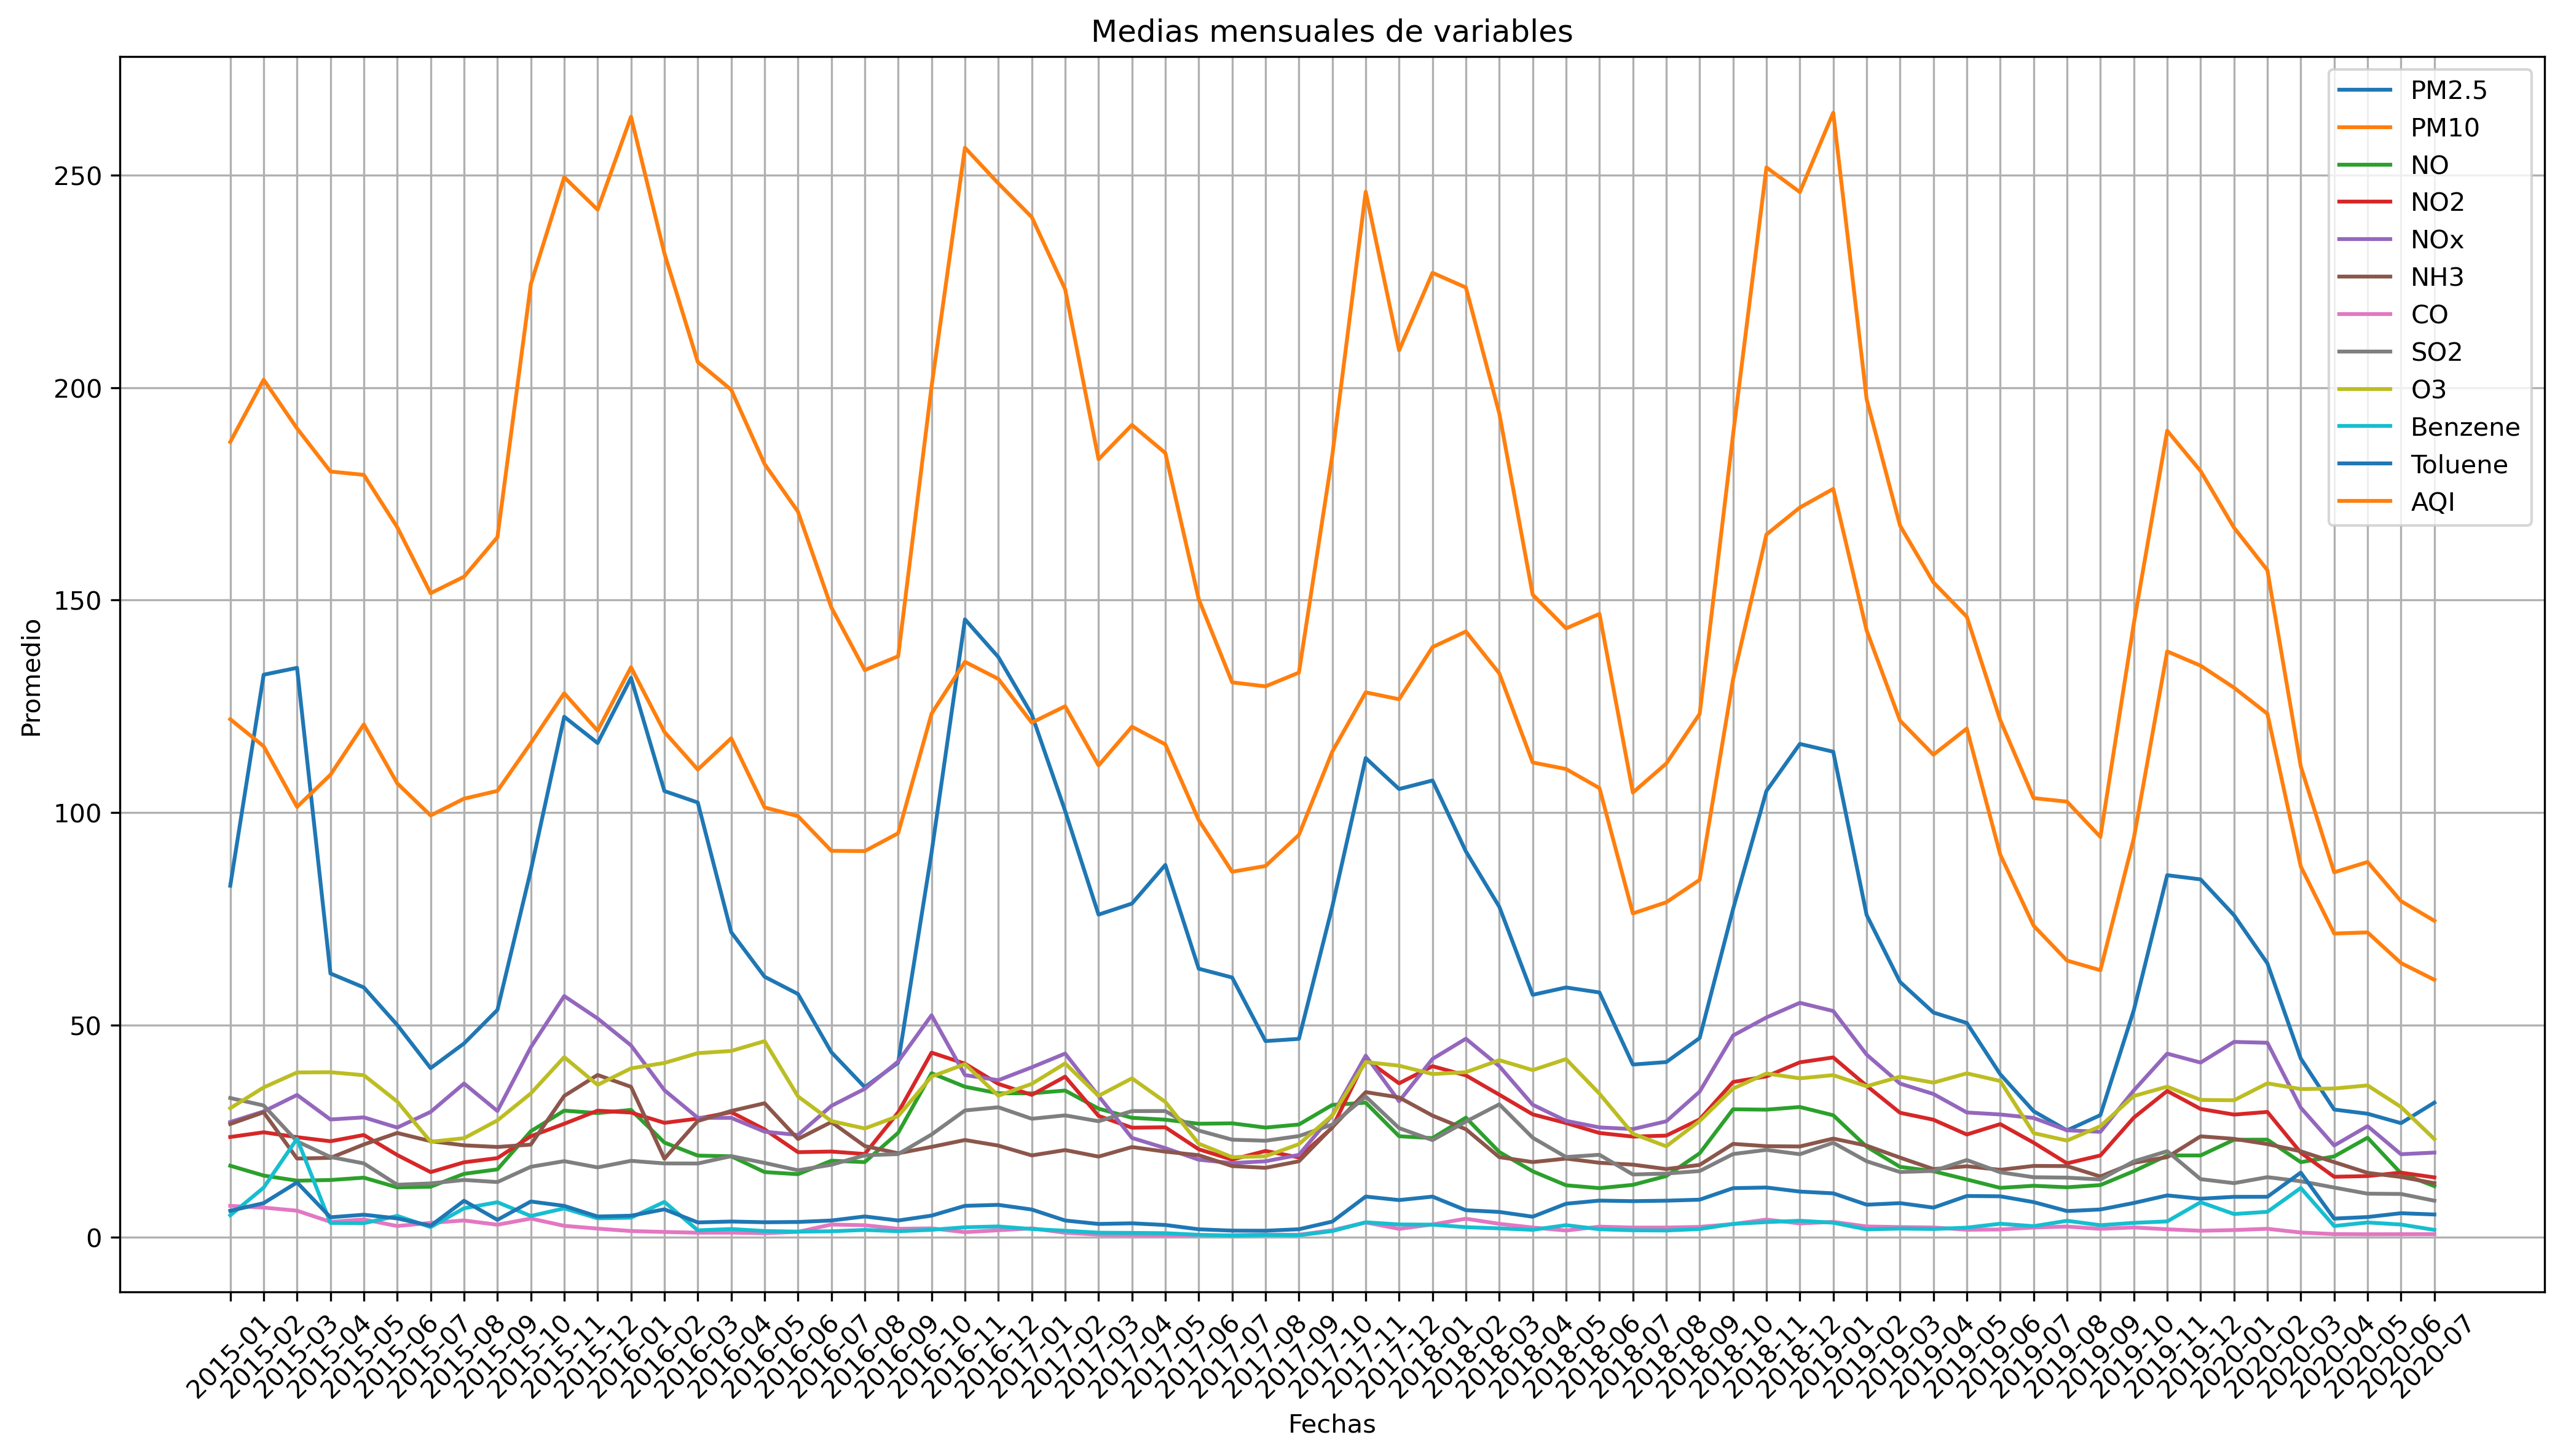

In [26]:
# Seleccionar columnas numéricas
numerical_cols = df.select_dtypes(include='number').columns.tolist()

# Asegurarse de que la columna 'Date' esté en formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Crear una columna 'Month' que represente el mes y año
df['Month'] = df['Date'].dt.to_period('M')

# Agrupar por mes y calcular la media
monthly_data = df.groupby('Month')[numerical_cols].mean()

# Graficar los datos mensuales
plt.figure(figsize=(14, 8), dpi=300)

# Graficar cada columna numérica
for col in numerical_cols:
    plt.plot(monthly_data.index.astype(str), monthly_data[col], label=col)

plt.xlabel('Fechas')
plt.ylabel('Promedio')
plt.title('Medias mensuales de variables')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

El gráfico de lineas anterior es un gráfico que muestra las medias mensuales de valores numéricos como AQI, PM10, PM2,5, NO, NO2. Según las fluctuaciones que se observan aquí, puede decirse que los valores cambian de acuerdo con cierta estacionalidad.

Si nos fijamos en los intervalos estacionales de la India, se observa que diciembre y enero coinciden con la estación invernal. Puede decirse que el valor AQI aumenta como consecuencia del incremento del uso de combustibles como el carbón, la madera, los aparatos de calefacción y los vehículos en los meses de invierno.

El hecho de que los meses de junio y julio coincidan con el periodo de los monzones ofrece la oportunidad de que el aire se disperse y limpie debido al aumento de las precipitaciones y los vientos. Por este motivo, puede decirse que el valor AQI disminuye y la calidad del aire aumenta.

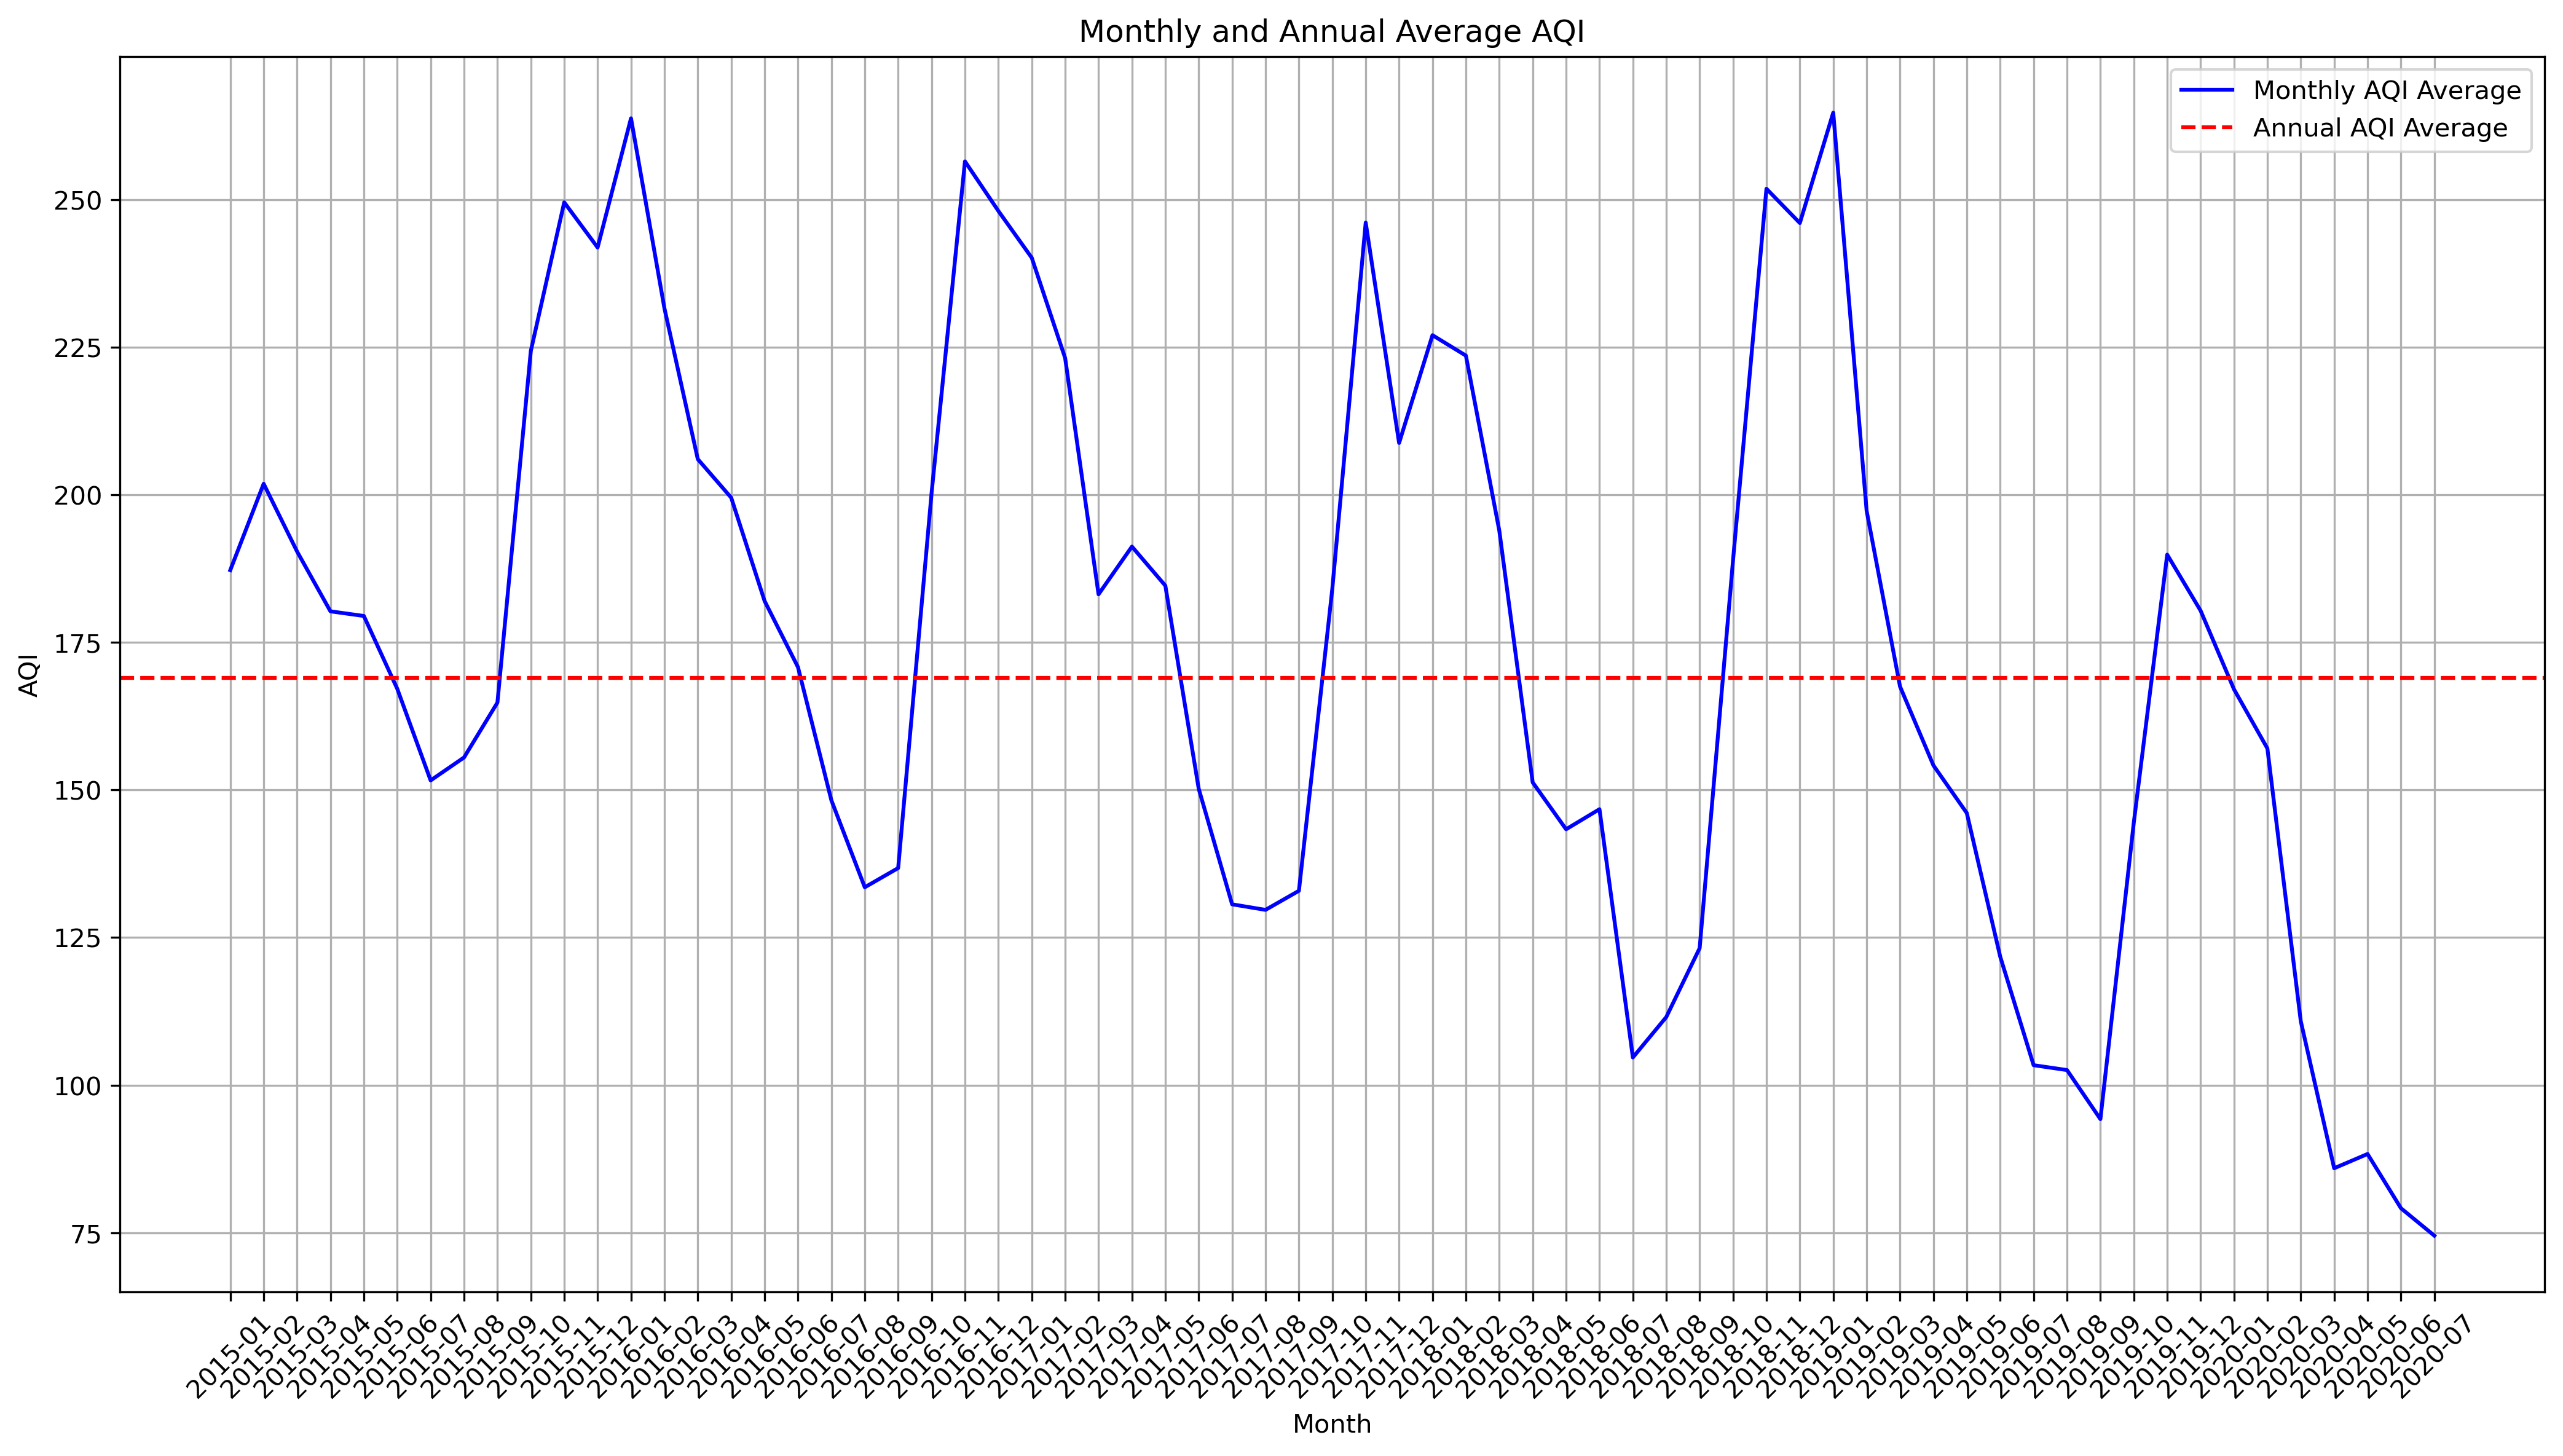

In [27]:
df['Month'] = df['Date'].dt.to_period('M')
df['Year'] = df['Date'].dt.year

monthly_aqi = df.groupby('Month')['AQI'].mean()

annual_aqi_mean = df.groupby('Year')['AQI'].mean()

plt.figure(figsize=(14, 8), dpi=300)

plt.plot(monthly_aqi.index.astype(str), monthly_aqi, label='Monthly AQI Average', color='blue')

plt.axhline(y=annual_aqi_mean.mean(), color='red', linestyle='--', label='Annual AQI Average')

plt.xlabel('Month')
plt.ylabel('AQI')
plt.title('Monthly and Annual Average AQI')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se trata de un gráfico lineal que muestra las medias mensuales del valor AQI. Observamos que el valor AQI alcanza el nivel más alto en diciembre-enero y el más bajo en junio-julio.

c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


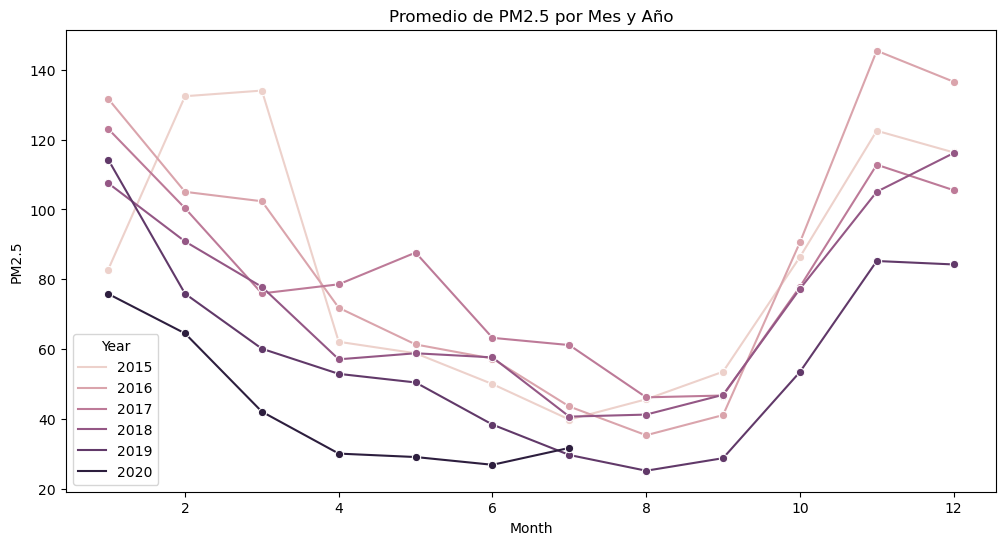

In [28]:
# Extraer mes y año para análisis temporal
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Promedio mensual de contaminantes por año
monthly_pollution = df.groupby(['Year', 'Month'])[['PM2.5', 'PM10']].mean().reset_index()

# Visualización del promedio mensual de PM2.5 y PM10
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='PM2.5', hue='Year', data=monthly_pollution, marker="o")
plt.title('Promedio de PM2.5 por Mes y Año')
plt.show()

<Axes: title={'center': 'AQI per Year'}, xlabel='Year', ylabel='AQI'>

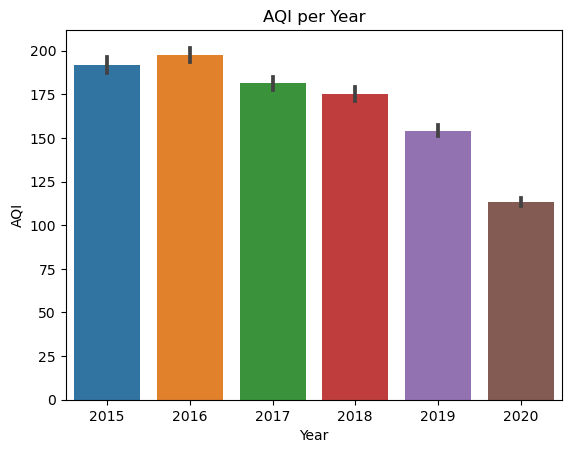

In [29]:
plt.title('AQI per Year')
sns.barplot(x='Year',y='AQI',data=df)

Los gráficos sugieren que sí existen patrones temporales que afectan los niveles de contaminación:

**Estacionalidad**: Se observan fluctuaciones estacionales claras en los niveles de contaminación, con picos elevados durante los meses de invierno (noviembre a enero) y niveles más bajos en los meses cálidos (junio a septiembre). Esto se refleja en la evolución del **PM2.5**, **PM10** y el **AQI**, donde los contaminantes finos juegan un rol clave en los meses fríos.

**Tendencias anuales**: En el gráfico de AQI por año, se observa una tendencia decreciente en los niveles de contaminación a partir de 2019. Los niveles de AQI han disminuido de manera constante, sugiriendo una mejora en la calidad del aire. Esto podría estar relacionado con políticas ambientales más estrictas o cambios en el comportamiento humano y condiciones meteorológicas.

**Variaciones mensuales**: El promedio de PM2.5 por mes y año confirma que los niveles de contaminación tienden a ser más altos al final del año, debido posiblemente a la quema de combustibles, festividades o factores meteorológicos, como la reducción en la dispersión de contaminantes durante el invierno.

En resumen, los niveles de contaminación muestran un patrón cíclico y estacional, con fluctuaciones mensuales y anuales influenciadas por factores climáticos, eventos específicos y posiblemente medidas regulatorias.

3. **¿Qué contaminantes contribuyen más al aumento del AQI?**

In [30]:
# Mostrar la matriz de correlacion para variables numericas
corr_matrix = df.select_dtypes(include='number').corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Month,Year
PM2.5,1.000000,0.495538,0.247373,0.307173,0.287263,0.133149,0.093466,0.091212,0.145758,0.018672,0.108318,0.589519,0.021488,-0.196280
PM10,0.495538,1.000000,0.294324,0.344601,0.387465,0.200548,0.023932,0.085846,0.206202,0.015059,0.126400,0.423907,-0.012204,-0.067119
NO,0.247373,0.294324,1.000000,0.296795,0.633110,0.086097,0.126906,0.386170,-0.021975,-0.006313,0.065911,0.303906,0.031187,-0.057621
NO2,0.307173,0.344601,0.296795,1.000000,0.490100,0.153089,0.356839,0.132928,0.303297,0.028523,0.298395,0.508065,0.027706,-0.034138
NOx,0.287263,0.387465,0.633110,0.490100,1.000000,0.085657,0.191990,0.274049,0.082911,0.015677,0.145559,0.367207,0.022836,-0.007535
NH3,0.133149,0.200548,0.086097,0.153089,0.085657,1.000000,-0.014252,-0.077562,0.077555,0.009828,0.020040,0.083633,0.013439,-0.116269
CO,0.093466,0.023932,0.126906,0.356839,0.191990,-0.014252,1.000000,0.263244,0.051878,0.069262,0.285559,0.635978,-0.001473,-0.057421
SO2,0.091212,0.085846,0.386170,0.132928,0.274049,-0.077562,0.263244,1.000000,0.039959,-0.016178,0.106775,0.249397,0.004764,-0.102122
O3,0.145758,0.206202,-0.021975,0.303297,0.082911,0.077555,0.051878,0.039959,1.000000,0.032433,0.144332,0.193956,-0.079560,-0.001898
Benzene,0.018672,0.015059,-0.006313,0.028523,0.015677,0.009828,0.069262,-0.016178,0.032433,1.000000,0.623681,0.036467,-0.016032,0.005503


In [31]:
# Mostrar la correlacion para la variable objetivo AQI
corr_matrix['AQI'].sort_values(ascending=False)

AQI        1.000000
CO         0.635978
PM2.5      0.589519
NO2        0.508065
PM10       0.423907
NOx        0.367207
NO         0.303906
Toluene    0.269121
SO2        0.249397
O3         0.193956
NH3        0.083633
Benzene    0.036467
Month      0.013649
Year      -0.177626
Name: AQI, dtype: float64

Los contaminantes que más contribuyen al aumento del `AQI` son el `CO`, `PM2.5`, `NO2`, `PM10` y `NOx`, con correlaciones altas que sugieren que estos contaminantes juegan un papel fundamental en la determinación de la calidad del aire en las ciudades analizadas.

4. **¿Cómo varía la calidad del aire entre zonas industriales y residenciales?**

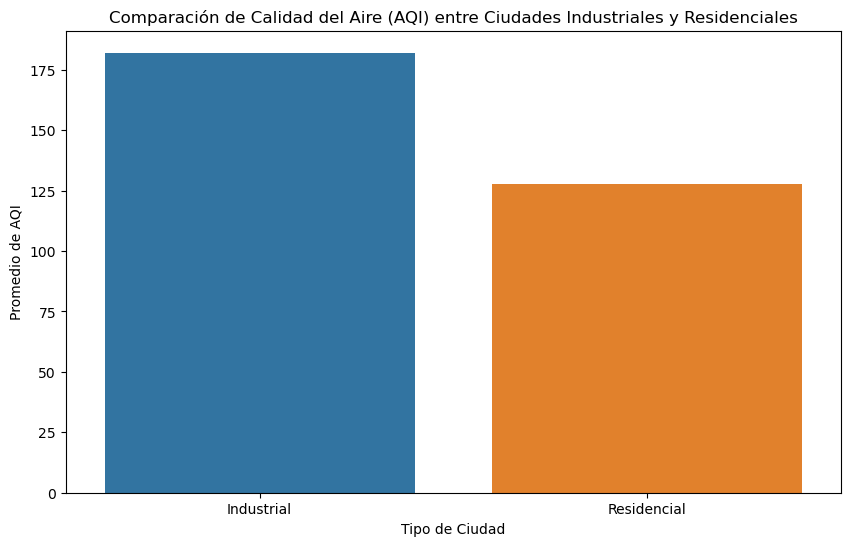

In [32]:
# Clasificación manual de las ciudades según sean industriales o residenciales
ciudades_industriales = ['Ahmedabad', 'Delhi', 'Mumbai', 'Chennai', 'Hyderabad', 'Patna', 'Gurugram', 
                         'Visakhapatnam', 'Amritsar', 'Jaipur', 'Brajrajnagar', 'Talcher', 'Kolkata', 'Coimbatore']
ciudades_residenciales = ['Bengaluru', 'Lucknow', 'Jorapokhar', 'Thiruvananthapuram', 'Amaravati', 
                          'Guwahati', 'Shillong', 'Chandigarh', 'Bhopal', 'Ernakulam', 'Kochi', 'Aizawl']

# Crear una nueva columna que indique si una ciudad es Industrial o Residencial
df['City_Type'] = df['City'].apply(lambda x: 'Industrial' if x in ciudades_industriales else 'Residencial')

# Ahora podemos hacer un análisis de la calidad del aire entre estas dos categorías
# Usaremos la columna 'AQI' para representar la calidad del aire

# Calcular el promedio de AQI por tipo de ciudad
aqi_by_city_type = df.groupby('City_Type')['AQI'].mean().reset_index()

# Mostrar un gráfico de comparación de AQI entre zonas industriales y residenciales
plt.figure(figsize=(10, 6))
sns.barplot(x='City_Type', y='AQI', data=aqi_by_city_type)
plt.title('Comparación de Calidad del Aire (AQI) entre Ciudades Industriales y Residenciales')
plt.ylabel('Promedio de AQI')
plt.xlabel('Tipo de Ciudad')
plt.show()

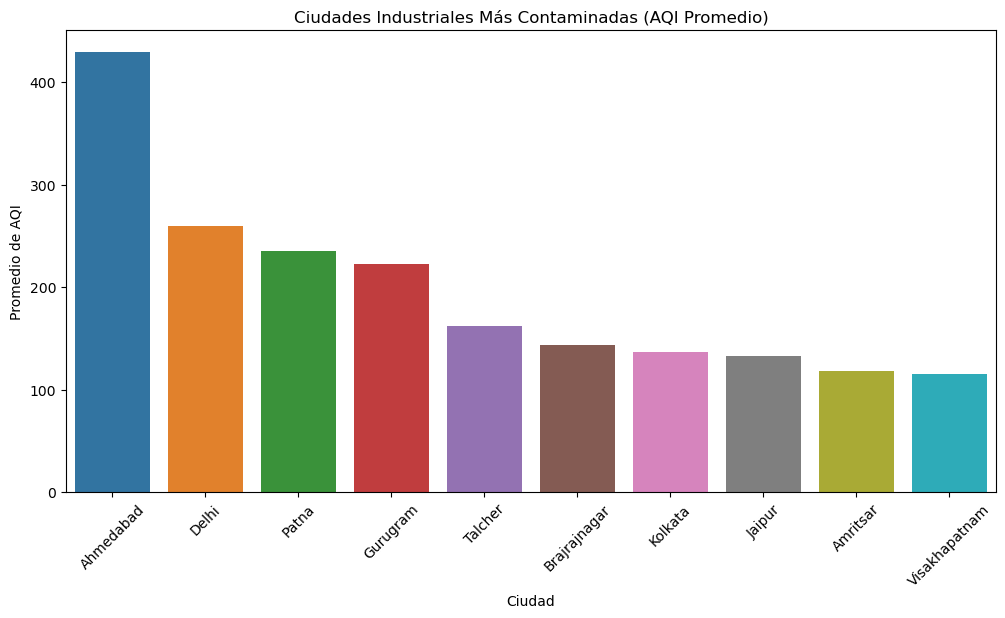

In [33]:
# Filtrar solo las ciudades industriales
df_industriales = df[df['City_Type'] == 'Industrial']

# Calcular el promedio de AQI por ciudad
aqi_industrial = df_industriales.groupby('City')['AQI'].mean().reset_index()

# Ordenar las ciudades industriales por el valor de AQI (de mayor a menor)
aqi_industrial_sorted = aqi_industrial.sort_values(by='AQI', ascending=False).head(10)

# Graficar las ciudades industriales más contaminadas
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='AQI', data=aqi_industrial_sorted)
plt.title('Ciudades Industriales Más Contaminadas (AQI Promedio)')
plt.ylabel('Promedio de AQI')
plt.xlabel('Ciudad')
plt.xticks(rotation=45)
plt.show()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Lucknow'),
  Text(1, 0, 'Jorapokhar'),
  Text(2, 0, 'Guwahati'),
  Text(3, 0, 'Bhopal'),
  Text(4, 0, 'Kochi'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Bengaluru'),
  Text(7, 0, 'Amaravati'),
  Text(8, 0, 'Ernakulam'),
  Text(9, 0, 'Thiruvananthapuram')])

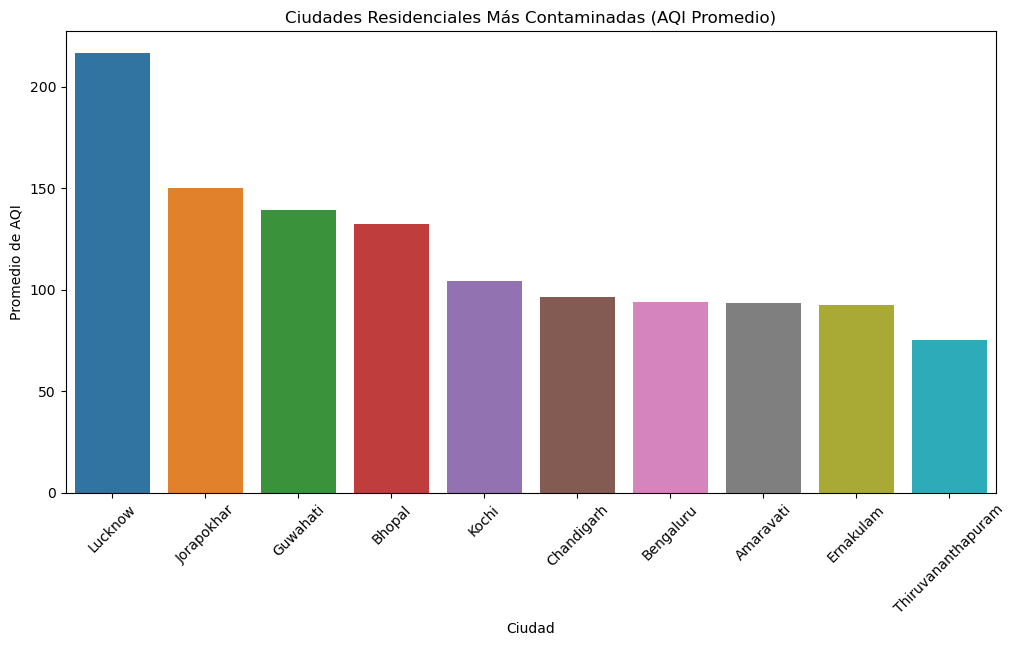

In [34]:
# Filtrar solo las ciudades residenciales
df_residenciales = df[df['City_Type'] == 'Residencial']

# Calcular el promedio de AQI por ciudad
aqi_residencial = df_residenciales.groupby('City')['AQI'].mean().reset_index()

# Ordenar las ciudades residenciales por el valor de AQI (de mayor a menor)
aqi_residencial_sorted = aqi_residencial.sort_values(by='AQI', ascending=False).head(10)

# Graficar las ciudades residenciales más contaminadas
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='AQI', data=aqi_residencial_sorted)
plt.title('Ciudades Residenciales Más Contaminadas (AQI Promedio)')
plt.ylabel('Promedio de AQI')
plt.xlabel('Ciudad')
plt.xticks(rotation=45)

 Los resultados reflejan la diferencia en los niveles de contaminación atmosférica, destacando cómo las ciudades con una mayor actividad industrial tienden a tener un AQI más alto (peor calidad del aire) en comparación con las ciudades más residenciales.

5. **¿Qué ciudades necesitan intervenciones más urgentes para mejorar su calidad del aire?**

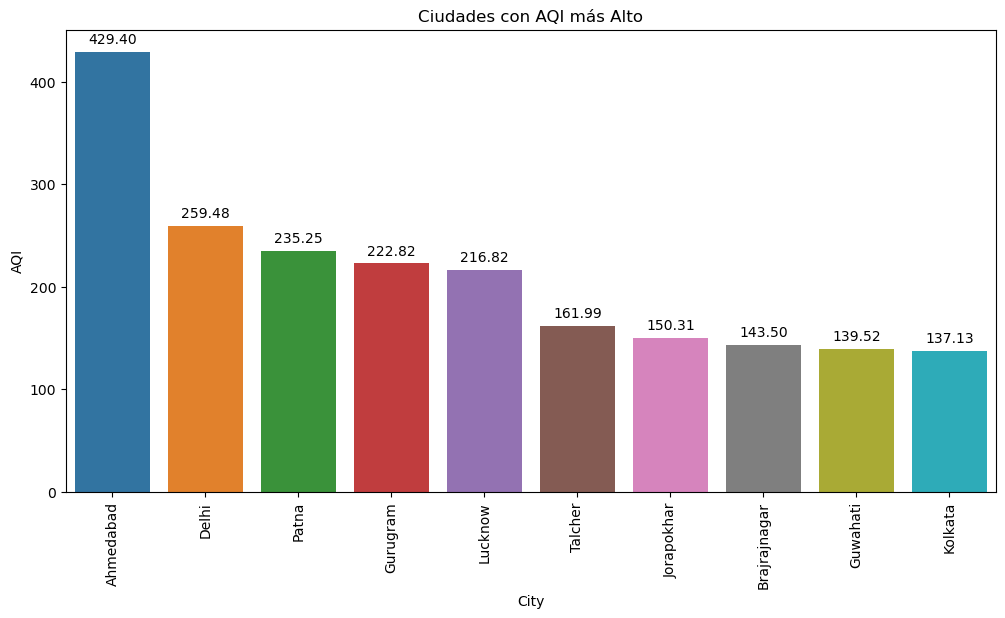

In [35]:
# Promedio de AQI por ciudad
city_aqi = df.groupby('City')['AQI'].mean().reset_index()

# Visualizar las ciudades con AQI más alto
top_cities_aqi = city_aqi.sort_values(by='AQI', ascending=False).head(10)

# Graficar las ciudades con etiquetas en la barra para mostrar los valores de AQI
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='City', y='AQI', data=top_cities_aqi)
plt.xticks(rotation=90)
plt.title('Ciudades con AQI más Alto')

# Añadir etiquetas con el valor exacto de AQI dentro de las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

La calidad del aire varía significativamente entre las zonas industriales y residenciales, siendo notablemente peor en las ciudades industriales. Las ciudades industriales tienen un promedio de AQI mucho más alto, con ejemplos como Ahmedabad y Delhi superando los 300, mientras que las ciudades residenciales más contaminadas, como Lucknow, tienen un AQI inferior a 200. Esto sugiere que las actividades industriales contribuyen considerablemente a la contaminación del aire, generando un mayor impacto en la calidad del aire en comparación con las áreas residenciales, que muestran niveles más bajos de contaminación.

## Normalización de Variables

Las variables más importantes que afectan al valor AQI parecen ser las PM2.5, PM10, NO2 y CO. Haremos predicciones basadas en datos superiores a 0.25.

In [36]:
# Eliminamos las columnas Benceno, O3 del DataFrame.
df=df.drop(columns=[ 'Benzene', 'O3'])

### Variables Continuas

__Flujo recomendado__:

Dado que los datos tienen asimetría hacia la derecha, una transformación logarítmica es muy útil para comprimir la escala de los valores grandes y hacer que la distribución se acerque más a una distribución normal. 

1. Aplicar transformación logarítmica para corregir la asimetría hacia la derecha.

Si, además de la asimetría, los datos contienen outliers significativos que afectan la media, usar Robust Scaler después de la transformación logarítmica puede ser útil. Este método utiliza los cuartiles (Q1 y Q3) para reducir el impacto de los outliers.

2. Escalar los datos Robust Scaler para poner los valores en un rango adecuado para el análisis y modelado.

In [37]:
import numpy as np

# Filtrar las columnas numéricas que aún existen en el DataFrame
numerical_cols = [col for col in numerical_cols if col in df.columns]

# Aplicar la transformación logarítmica a las columnas numéricas restantes
df[numerical_cols] = np.log1p(df[numerical_cols])  # log(1 + x) para evitar problemas con valores cero

# Mostrar las primeras filas después de la transformación logarítmica
df[numerical_cols].head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI
0,3.8865,4.571407,0.652325,2.955951,2.898671,2.824351,0.652325,3.354804,0.019803,5.954541
1,3.8865,4.571407,0.678034,2.814810,2.859913,2.824351,0.678034,3.240637,1.871802,5.954541
2,3.8865,4.571407,2.912351,3.010621,3.424263,2.824351,2.912351,3.403528,2.856470,5.954541
3,3.8865,4.571407,0.993252,2.969388,2.942859,2.824351,0.993252,2.975019,2.410542,5.954541
4,3.8865,4.571407,3.139833,3.109953,3.657389,2.824351,3.139833,3.697096,2.990217,5.954541


In [38]:
from sklearn.preprocessing import RobustScaler

# 2: Aplicar Robust Scaler después de la transformación logarítmica
scaler = RobustScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Mostrar las primeras filas después de Robust Scaler
df[numerical_cols].head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI
0,0.0,0.0,-1.442232,-0.093941,-0.317236,0.0,0.036177,0.987203,-1.208410,1.350777
1,0.0,0.0,-1.421407,-0.224461,-0.353482,0.0,0.095233,0.872947,0.438415,1.350777
2,0.0,0.0,0.388515,-0.043386,0.174289,0.0,5.227841,1.035965,1.313996,1.350777
3,0.0,0.0,-1.166063,-0.081515,-0.275912,0.0,0.819343,0.607121,0.917471,1.350777
4,0.0,0.0,0.572788,0.048472,0.392305,0.0,5.750406,1.329763,1.432926,1.350777


c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

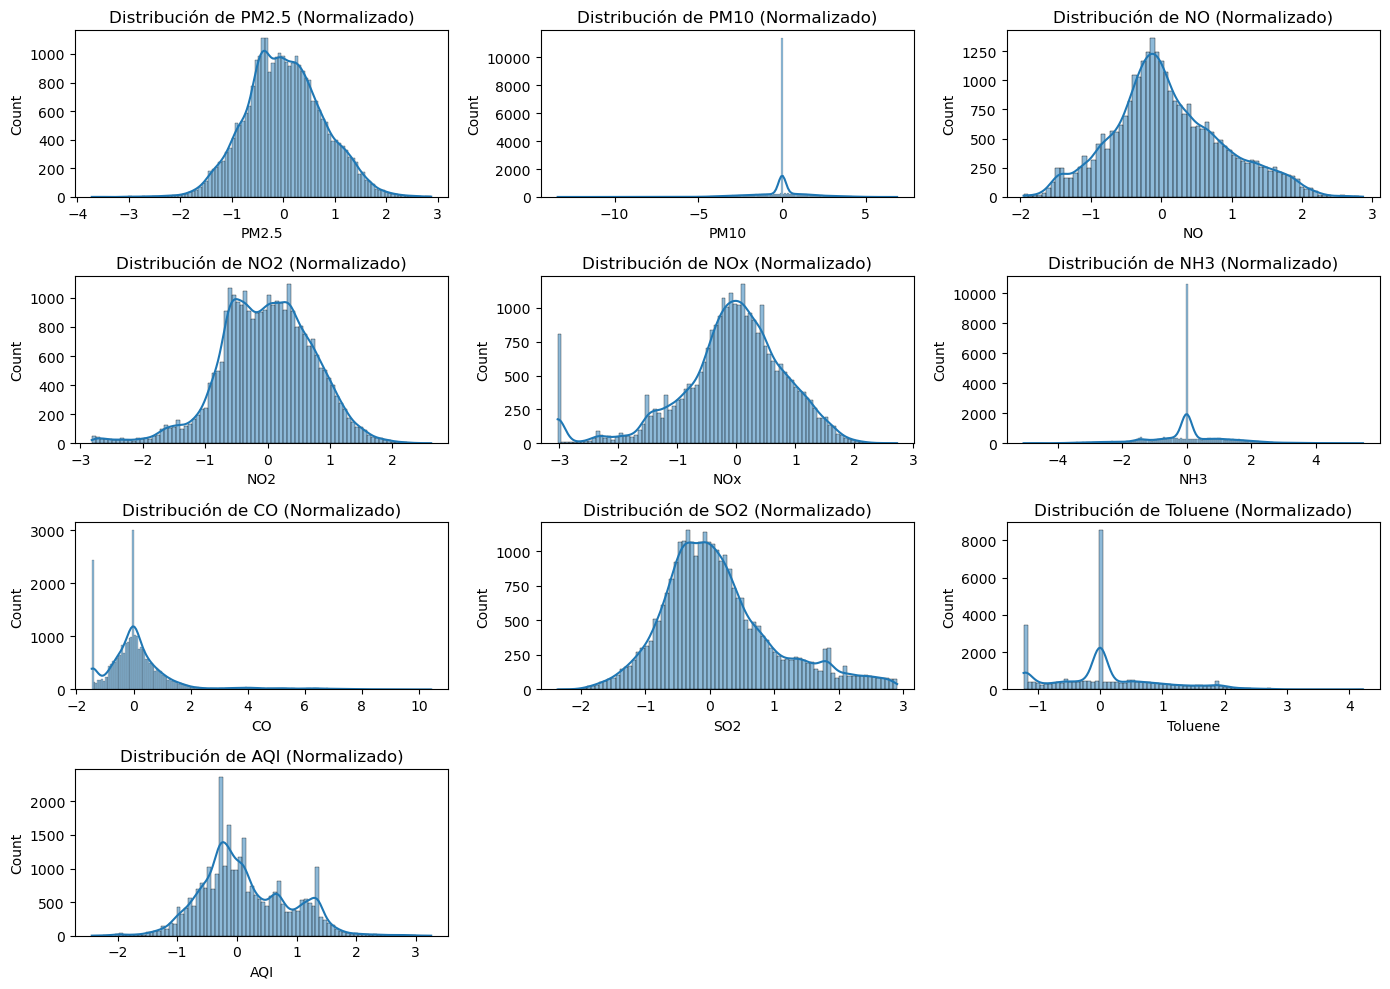

In [39]:
# Graficar la distribución de las columnas numéricas después de la normalización logarítmica
plt.figure(figsize=(14, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col} (Normalizado)')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### Variables Categoricas

Utilizaremos la codificación `One-Hot Encoding`. Esta técnica convierte cada categoría en una columna binaria donde el valor es 1 si la observación pertenece a esa categoría y 0 en caso contrario. Es útil cuando las categorías no tienen un orden inherente.

In [40]:
from sklearn.preprocessing import OneHotEncoder

# Aplicar One-Hot Encoding a las variables categóricas como 'City' y 'AQI_Bucket'
categorical_cols = ['City','City_Type', 'AQI_Bucket']  # Las columnas categóricas a codificar

# Utilizar OneHotEncoder para las columnas categóricas
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop=first' para evitar multicolinealidad
encoded_categorical = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), 
                                   columns=encoder.get_feature_names_out(categorical_cols))

# Convertir las columnas codificadas a tipo int
encoded_categorical = encoded_categorical.astype(int)

# Eliminar las columnas categóricas originales del DataFrame y concatenar con las codificadas
df.drop(columns=categorical_cols, inplace=True)
df = pd.concat([df, encoded_categorical], axis=1)

# Mostrar las primeras filas del DataFrame consolidado
df.head()

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,...,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam,City_Type_Residencial,AQI_Bucket_Moderate,AQI_Bucket_Poor,AQI_Bucket_Satisfactory,AQI_Bucket_Severe,AQI_Bucket_Very Poor
0,2015-01-01,0.0,0.0,-1.442232,-0.093941,-0.317236,0.0,0.036177,0.987203,-1.208410,...,0,0,0,0,0,0,0,0,1,0
1,2015-01-02,0.0,0.0,-1.421407,-0.224461,-0.353482,0.0,0.095233,0.872947,0.438415,...,0,0,0,0,0,0,0,0,1,0
2,2015-01-03,0.0,0.0,0.388515,-0.043386,0.174289,0.0,5.227841,1.035965,1.313996,...,0,0,0,0,0,0,0,0,1,0
3,2015-01-04,0.0,0.0,-1.166063,-0.081515,-0.275912,0.0,0.819343,0.607121,0.917471,...,0,0,0,0,0,0,0,0,1,0
4,2015-01-05,0.0,0.0,0.572788,0.048472,0.392305,0.0,5.750406,1.329763,1.432926,...,0,0,0,0,0,0,0,0,1,0


In [41]:
# Mostrar las columnas del DataFrame
df.columns

Index(['Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'Toluene', 'AQI', 'Month', 'Year', 'City_Aizawl', 'City_Amaravati',
       'City_Amritsar', 'City_Bengaluru', 'City_Bhopal', 'City_Brajrajnagar',
       'City_Chandigarh', 'City_Chennai', 'City_Coimbatore', 'City_Delhi',
       'City_Ernakulam', 'City_Gurugram', 'City_Guwahati', 'City_Hyderabad',
       'City_Jaipur', 'City_Jorapokhar', 'City_Kochi', 'City_Kolkata',
       'City_Lucknow', 'City_Mumbai', 'City_Patna', 'City_Shillong',
       'City_Talcher', 'City_Thiruvananthapuram', 'City_Visakhapatnam',
       'City_Type_Residencial', 'AQI_Bucket_Moderate', 'AQI_Bucket_Poor',
       'AQI_Bucket_Satisfactory', 'AQI_Bucket_Severe', 'AQI_Bucket_Very Poor'],
      dtype='object')

In [42]:
df.corr().style.background_gradient(cmap='coolwarm')

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Month,Year,City_Aizawl,City_Amaravati,City_Amritsar,City_Bengaluru,City_Bhopal,City_Brajrajnagar,City_Chandigarh,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Gurugram,City_Guwahati,City_Hyderabad,City_Jaipur,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam,City_Type_Residencial,AQI_Bucket_Moderate,AQI_Bucket_Poor,AQI_Bucket_Satisfactory,AQI_Bucket_Severe,AQI_Bucket_Very Poor
Date,1.000000,-0.235095,-0.176649,-0.093783,-0.089276,0.033266,-0.187399,-0.114676,-0.025754,0.105848,-0.250486,-0.016894,0.982323,0.081651,0.101001,0.063885,-0.110923,0.115024,0.102432,0.116608,-0.110923,0.122981,-0.110923,0.094529,-0.026958,0.126625,-0.110096,0.080215,0.072074,0.094529,0.114242,-0.110923,-0.110923,-0.070722,0.117202,0.103827,0.080500,0.020078,0.133791,-0.025676,-0.042888,0.098340,-0.126425,-0.085880
PM2.5,-0.235095,1.000000,0.647974,0.333542,0.408706,0.347992,0.280393,0.255585,0.211471,0.250397,0.773525,-0.021948,-0.226275,-0.119110,-0.123831,-0.028295,-0.148818,-0.025328,0.019521,-0.049782,-0.021064,-0.086758,0.217303,-0.079328,0.184172,-0.010972,-0.084674,-0.000824,0.126909,-0.058572,-0.040251,0.202121,-0.178660,0.190177,-0.133880,-0.016772,-0.185294,-0.082530,-0.128002,0.091940,0.249921,-0.490055,0.305155,0.410102
PM10,-0.176649,0.647974,1.000000,0.364437,0.393711,0.345424,0.308411,0.153879,0.240474,0.238438,0.608833,-0.048281,-0.163828,-0.168374,-0.103246,0.019900,-0.075418,0.020222,0.029686,-0.034433,-0.031660,-0.182568,0.334646,-0.091441,0.109334,-0.018415,-0.043414,0.059998,0.066782,-0.067972,-0.022874,0.013845,-0.011384,0.020272,-0.165299,0.034691,-0.209836,0.011355,-0.224291,0.171001,0.252701,-0.370356,0.135519,0.257901
NO,-0.093783,0.333542,0.364437,1.000000,0.381580,0.623187,0.273275,0.169879,0.418357,0.114655,0.407934,0.039926,-0.099341,-0.019955,-0.185350,0.057360,-0.107569,-0.077383,0.016711,-0.055284,-0.098293,-0.079514,0.230147,-0.015085,-0.006451,-0.011081,-0.135727,-0.012470,-0.042028,0.114808,0.017325,-0.029078,0.328995,0.127447,-0.201138,0.110557,-0.258842,-0.064081,-0.332730,-0.076384,0.089646,-0.138919,0.261579,0.198373
NO2,-0.089276,0.408706,0.393711,0.381580,1.000000,0.468266,0.369396,0.291742,0.132288,0.384582,0.453934,0.014018,-0.090065,-0.211913,-0.042508,-0.058872,0.075461,0.025565,-0.075296,-0.076340,-0.078831,0.011793,0.274914,-0.181446,-0.008202,-0.071923,0.058956,0.088113,-0.187454,-0.072385,0.090702,0.108632,-0.093382,0.104323,-0.221632,-0.176534,-0.210610,0.083939,-0.231142,0.008338,0.133132,-0.224466,0.225577,0.205472
NOx,0.033266,0.347992,0.345424,0.623187,0.468266,1.000000,0.208536,0.206449,0.331882,0.244394,0.384691,0.004118,0.031809,-0.040108,-0.108103,0.034138,-0.166481,-0.023714,-0.065346,-0.055130,-0.080689,0.011533,0.190983,-0.048684,-0.012303,0.031612,-0.077035,0.085361,0.162503,0.064707,0.115561,-0.100172,0.210926,0.093744,-0.257829,-0.001975,-0.228719,-0.074129,-0.280458,-0.022726,0.128486,-0.149632,0.185542,0.163562
NH3,-0.187399,0.280393,0.308411,0.273275,0.369396,0.208536,1.000000,0.095595,0.027710,0.098183,0.258106,-0.014248,-0.180971,0.025594,-0.093895,-0.086729,0.061956,0.014977,0.086139,0.042658,0.281189,-0.095354,0.335095,-0.033213,0.004161,-0.107103,-0.025985,0.104899,-0.150337,-0.084677,-0.013660,0.077103,-0.017648,-0.003669,-0.179477,-0.105344,-0.297909,-0.135322,-0.218946,0.053313,0.108079,-0.143669,0.058172,0.124757
CO,-0.114676,0.255585,0.153879,0.169879,0.291742,0.206449,0.095595,1.000000,0.213955,0.401021,0.543988,-0.003778,-0.111498,-0.048777,-0.075139,-0.111508,0.015271,-0.021035,0.031355,-0.042664,-0.052855,-0.020232,0.068916,0.023036,-0.039124,-0.045457,-0.132592,-0.056751,-0.072843,0.008848,-0.052342,0.097051,-0.168493,0.045506,-0.079485,0.054150,-0.033698,-0.081584,-0.057648,-0.058040,0.104373,-0.279649,0.434284,0.190221
SO2,-0.025754,0.211471,0.240474,0.418357,0.132288,0.331882,0.027710,0.213955,1.000000,0.119

## Desarrollo de modelos de Machine Learning

In [43]:
# Definicion de variables
y = df['AQI']
X = df.drop(columns=['AQI'])

In [52]:
# Dividir el dataset en 80% para entrenamiento y 20% para prueba + validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el 20% en 10% para test y 10% para validación
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)